<a href="https://colab.research.google.com/github/gouyuanshuo/AI-and-data-science-python-notebook/blob/main/FDA_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedKFold, train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.calibration import CalibratedClassifierCV

# basic model in class
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
TRAIN_DATA_DIR = "/content/drive/MyDrive/32130 Fundamentals of Data Analytics/Assignment2/train_subset(in).csv"
TEST_DATA_DIR = "/content/drive/MyDrive/32130 Fundamentals of Data Analytics/Assignment2/test_kaggle_features(in).csv"

In [ ]:
# === 1) read data ===
train = pd.read_csv(TRAIN_DATA_DIR)
unknown = pd.read_csv(TEST_DATA_DIR)

TARGET = "satisfaction"
ID_COL = "id"
LABEL_POS = "satisfied"
LABEL_NEG = "neutral or dissatisfied"
train.shape

(83123, 24)

In [ ]:
train.isnull().sum()

,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0


In [ ]:
train.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,82874.000000
mean,64993.464432,39.393994,1186.755290,2.731518,3.060765,2.758057,2.979031,3.201436,3.249666,3.436401,3.358288,3.382157,3.348171,3.633411,3.303502,3.640653,3.286672,14.875305,15.261493
std,37471.108693,15.127582,995.226119,1.327142,1.526677,1.398677,1.277485,1.329876,1.349081,1.319621,1.332842,1.289352,1.317084,1.179165,1.263570,1.175092,1.313120,38.473936,38.932733
min,3.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,32556.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64986.000000,40.000000,840.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97481.500000,51.000000,1739.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,107529,Female,Loyal Customer,47,Business travel,Business,1521,3,3,3,...,4,4,4,4,4,4,3,0,0.0,satisfied
1,129312,Male,disloyal Customer,35,Business travel,Business,2586,3,3,3,...,3,5,5,5,5,4,3,0,0.0,neutral or dissatisfied
2,42352,Female,Loyal Customer,66,Personal Travel,Eco,550,2,4,2,...,4,4,2,4,3,4,5,78,82.0,neutral or dissatisfied
3,33349,Male,disloyal Customer,26,Business travel,Eco,1269,5,4,4,...,3,5,1,5,3,4,3,0,0.0,satisfied
4,92993,Male,Loyal Customer,48,Personal Travel,Eco,738,1,5,0,...,4,5,2,4,3,5,4,64,49.0,neutral or dissatisfied


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

def evaluat(best_model, X_test, y_test):

  y_pred_proba = best_model.predict_proba(X_test)[:, 1] # 获取正类的概率

  # 计算 ROC curve FPR, TPR 和阈值
  # roc_curve 函数返回三个值：
  #   fpr: 假正例率 (False Positive Rate)
  #   tpr: 真正例率 (True Positive Rate)
  #   thresholds: 对应于每个 (fpr, tpr) 对的分类阈值
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

  roc_auc = auc(fpr, tpr)
  cm=confusion_matrix(y_test, best_model.predict(X_test))

  print(classification_report(y_test, best_model.predict(X_test)))
  ConfusionMatrixDisplay(cm).plot()
  plt.show()
  print(f"ROC AUC: {roc_auc:.2f}")

  # draw ROC curve
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc="lower right")
  plt.grid(True)
  plt.show()
  return roc_auc

In [ ]:

numeric_cols = [
    "Age",
    "Flight Distance",
    "Arrival Delay in Minutes",
    "Departure Delay in Minutes",
    "Inflight wifi service",
    "Departure/Arrival time convenient",
    "Ease of Online booking",
    "Gate location",
    "Food and drink",
    "Online boarding",
    "Seat comfort",
    "Inflight entertainment",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Inflight service",
    "Cleanliness"
]
categorical_cols = [
    "Gender",
    "Customer Type",
    "Type of Travel",
    "Class"
]

X = train.drop(columns=[TARGET])
y = train[TARGET].map({LABEL_NEG:0, LABEL_POS:1})
X_unknown = unknown.copy()

y.head()

,satisfaction
0,1
1,0
2,0
3,1
4,0


# Data Preparation

In [ ]:
num_tf = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="median")),
    # closer to normal distribution and standardize it
    ("power", PowerTransformer(method="yeo-johnson", standardize=True))
])


cat_tf = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="most_frequent")),
    #One-hot encoding: converting categorical features into numerical values, ignoring unseen categories
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

# define the feature transformer

preprocess = ColumnTransformer(
    transformers=[
        # Apply numerical processing flow
        ("num", num_tf, [c for c in numeric_cols if c in X.columns]),

        ("cat", cat_tf, [c for c in categorical_cols if c in X.columns]),
    ],
    remainder="drop"
)



In [ ]:
X_processed = preprocess.fit_transform(X)


cat_features = preprocess.named_transformers_['cat']['ohe'].get_feature_names_out(categorical_cols)
all_feature_names = numeric_cols + list(cat_features)

X_processed_df = pd.DataFrame(
    X_processed,
    columns=all_feature_names
)

print(f"\n原始特征数: {X.shape[1]}")
print(f"处理后特征数: {X_processed_df.shape[1]}")
print("\n处理后的数据（前5行）:")
print(X_processed_df.head())


原始特征数: 23
处理后特征数: 27

处理后的数据（前5行）:
        Age  Flight Distance  Arrival Delay in Minutes  \
0  0.517133         0.660766                 -0.843012   
1 -0.265737         1.300693                 -0.843012   
2  1.710887        -0.470323                  1.561196   
3 -0.873570         0.450388                 -0.843012   
4  0.581223        -0.155741                  1.467303   

   Departure Delay in Minutes  Inflight wifi service  \
0                   -0.834427               0.232618   
1                   -0.834427               0.232618   
2                    1.564691              -0.522072   
3                   -0.834427               1.649201   
4                    1.532752              -1.324419   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                          -0.077904                0.196648       0.035598   
1                          -0.077904                0.196648       0.802970   
2                           0.602456     

#classification

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
10660,84916,Male,Loyal Customer,32,Personal Travel,Eco,547,3,2,3,...,4,3,4,1,3,2,4,3,19,15.0
14336,111974,Male,Loyal Customer,71,Business travel,Business,370,5,5,5,...,1,4,4,4,4,1,4,4,4,0.0
23846,54312,Male,Loyal Customer,45,Business travel,Business,1597,4,1,4,...,1,4,4,4,4,3,4,4,0,0.0
21268,61191,Female,Loyal Customer,41,Business travel,Business,846,5,5,5,...,4,5,5,5,5,5,5,4,2,4.0
66405,79065,Female,disloyal Customer,20,Business travel,Eco,356,3,0,2,...,1,1,1,2,4,3,4,1,0,0.0


#LogisticRegression

In [ ]:
from sklearn.model_selection import GridSearchCV


classifier_lr = LogisticRegression(max_iter=1000, solver="lbfgs")

full_pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocess),
    ('clf', classifier_lr)
])

param_lr = {
"clf__C": np.logspace(-2, 1, 10),
"clf__class_weight": [None, "balanced"]
}

gridSearch_lr = GridSearchCV(
    estimator=full_pipeline_lr,
    param_grid=param_lr,
    cv=2,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

print("Start training model...")
gridSearch_lr.fit(X_train, y_train)
print("Model training completed")

best_model_lr = gridSearch_lr.best_estimator_
best_params_lr = gridSearch_lr.best_params_
best_score_lr = gridSearch_lr.best_score_
best_score_lr

开始训练模型...
Fitting 2 folds for each of 20 candidates, totalling 40 fits
模型训练完成！


np.float64(0.8774248849589461)

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      9480
           1       0.87      0.84      0.85      7145

    accuracy                           0.88     16625
   macro avg       0.88      0.87      0.87     16625
weighted avg       0.88      0.88      0.88     16625



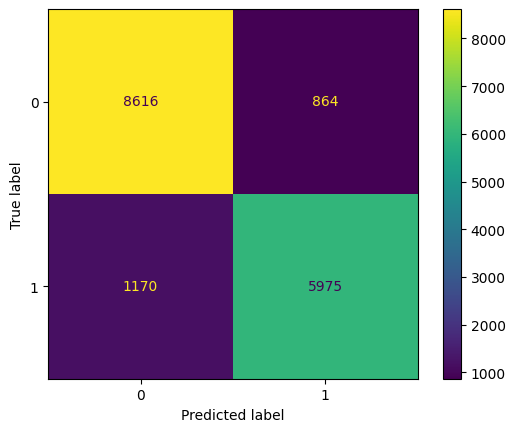

ROC AUC: 0.93


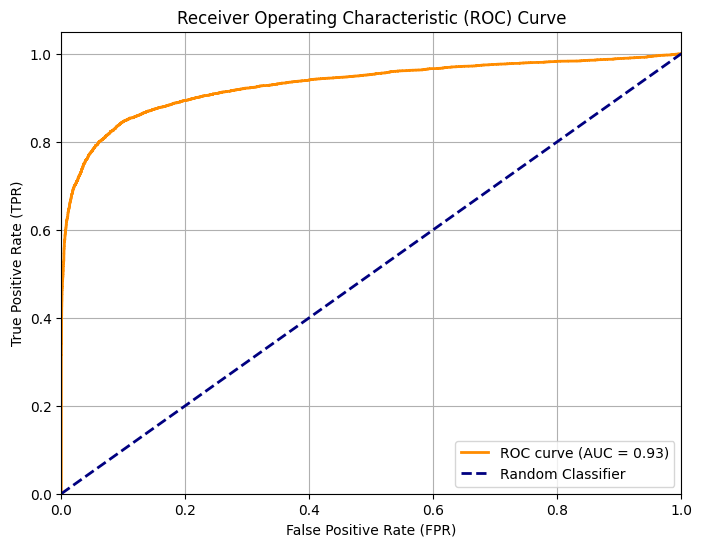

In [ ]:
roc_auc_lr=evaluat(best_model_lr, X_test, y_test)

#DecisionTree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state=RANDOM_STATE)

pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocess), # first step：data preprocess
    ('clf', classifier_dt)           # second step classification
])

param_dt = {
"clf__max_depth": [6, 10, 15, None],
"clf__min_samples_leaf": [1, 2, 5],
"clf__max_features": ["sqrt", "log2"]
}

gridSearch_dt = GridSearchCV(
    estimator=pipeline_dt,
    param_grid=param_dt,
    cv=2,                         # 2-fold cross validation
    scoring='accuracy',           # Evaluation indicators, which can be changed as needed (such as 'roc_auc', 'f1', etc.)
    n_jobs=-1,
    verbose=2
)
print("Start training model...")
gridSearch_dt.fit(X_train, y_train)
print("Model training completed")

best_model_dt = gridSearch_dt.best_estimator_
best_params_dt = gridSearch_dt.best_params_
best_score_dt = gridSearch_dt.best_score_
best_score_dt


Start training model...
Fitting 2 folds for each of 24 candidates, totalling 48 fits
Model training completed


np.float64(0.9277121116424554)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      9480
           1       0.93      0.90      0.92      7145

    accuracy                           0.93     16625
   macro avg       0.93      0.93      0.93     16625
weighted avg       0.93      0.93      0.93     16625



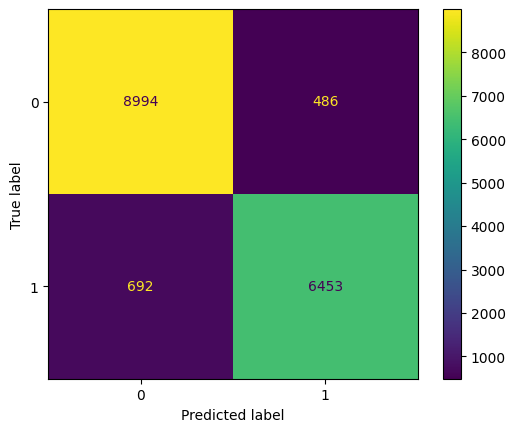

ROC AUC: 0.96


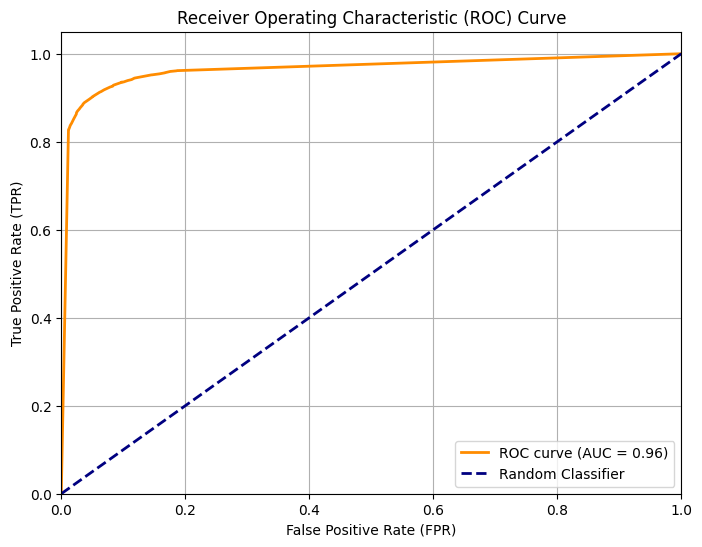

In [ ]:
roc_auc_dt=evaluat(best_model_dt, X_test, y_test)

#SVC

In [ ]:
classifier_svc = SVC(probability=True, random_state=RANDOM_STATE)

param_svc={
    "clf__C": [0.8, 1.0], # Penalty Parameter Penalty level for misclassified samples
    "clf__gamma": ["scale","auto"] #Kernel Coefficient，Default selection
}
pipeline_svc = Pipeline(steps=[
    ('preprocessor', preprocess), # first step：data preprocess
    ('clf', classifier_svc)           # second step classification
])

gridSearch_svc = GridSearchCV(
    estimator=pipeline_svc,
    param_grid=param_svc,
    cv=2,                   # 2-fold cross validation
    scoring='accuracy',           # Evaluation indicators, which can be changed as needed (such as 'roc_auc', 'f1', etc.)
    n_jobs=-1,                    # Use all cores for parallel computation
    verbose=2
)

print("Start training model...")
gridSearch_svc.fit(X_train, y_train)
print("Model training completed")


best_model_svc = gridSearch_svc.best_estimator_
best_params_svc = gridSearch_svc.best_params_
best_score_svc = gridSearch_svc.best_score_
best_score_svc


Start training model...
Fitting 2 folds for each of 4 candidates, totalling 8 fits
Model training completed


np.float64(0.9476675990255345)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      9480
           1       0.96      0.93      0.94      7145

    accuracy                           0.95     16625
   macro avg       0.95      0.95      0.95     16625
weighted avg       0.95      0.95      0.95     16625



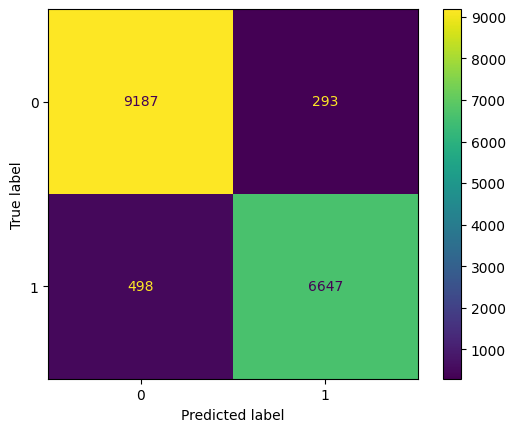

ROC AUC: 0.99


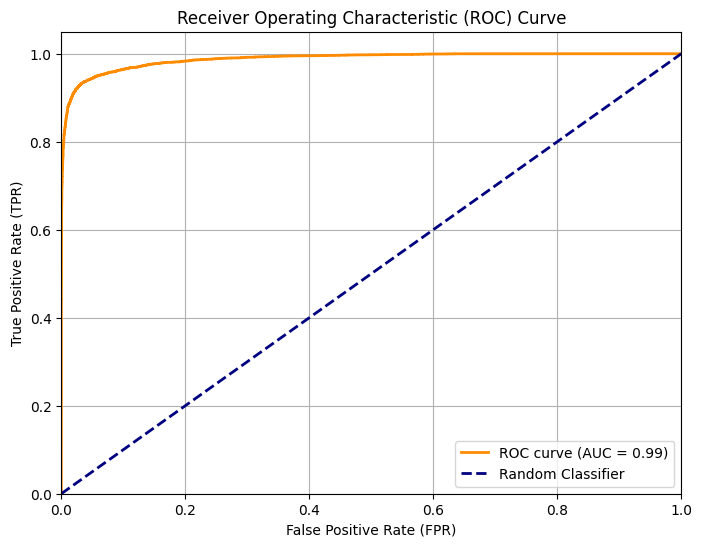

In [ ]:
roc_auc_svm=evaluat(best_model_svc, X_test, y_test)

#Random forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt



classifier_rf = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1)

# Building a complete machine learning pipeline
# Connecting the preprocessing steps to the classifier
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocess),       # first step：data preprocess
    ('clf', classifier_rf)           # second step classification
])


param_rf = {
    "clf__n_estimators": [200,600,1000],
    "clf__max_depth": [15, None],
    "clf__min_samples_leaf": [1, 5],
    "clf__max_features": ["sqrt", "log2"]
}


# GridSearchCV will exhaust all parameter combinations in param_rf to find the best model
gridSearch_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_rf,
    cv=2,                         # 2-fold cross validation
    scoring='accuracy',           # Evaluation indicators, which can be changed as needed (such as 'roc_auc', 'f1', etc.)
    n_jobs=-1,                    # Use all cores for parallel computation
    verbose=2
)

print("start fitting...")
gridSearch_rf.fit(X_train, y_train)
print("Model training completed")


best_model_rf = gridSearch_rf.best_estimator_
best_params_rf = gridSearch_rf.best_params_
best_score_rf = gridSearch_rf.best_score_

start fitting...
Fitting 2 folds for each of 24 candidates, totalling 48 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Model training completed


              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9480
           1       0.97      0.94      0.96      7145

    accuracy                           0.96     16625
   macro avg       0.96      0.96      0.96     16625
weighted avg       0.96      0.96      0.96     16625



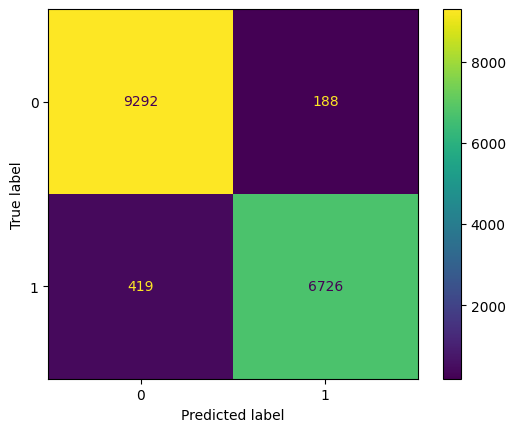

ROC AUC: 0.99


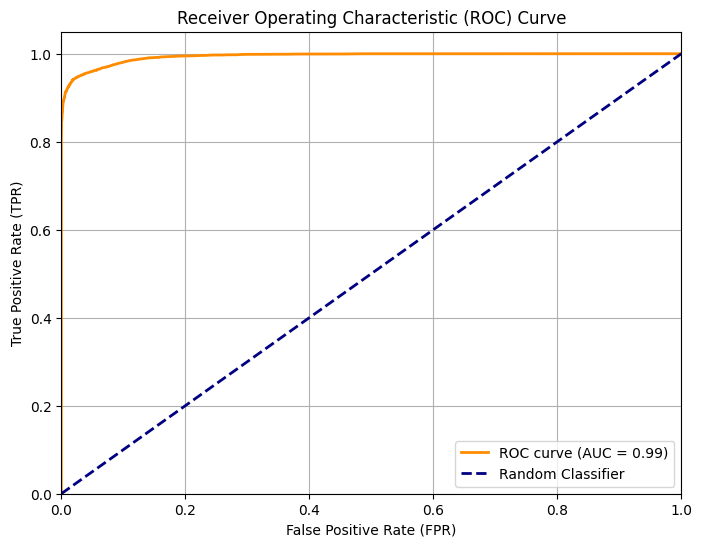

In [ ]:
roc_auc_rf=evaluat(best_model_rf, X_test, y_test)

#KNN

In [ ]:
classifier_knn = KNeighborsClassifier()

param_knn = {
"clf__n_neighbors": [3,5,7,9,15],
"clf__weights": ["uniform", "distance"],
"clf__p": [1,2],
}

pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocess), # first step：data preprocess
    ('clf', classifier_knn)           # second step classification
])

gridSearch_cnn = GridSearchCV(
    estimator=pipeline_knn,
    param_grid=param_knn,
    cv=2,                         # 2-fold cross validation
    scoring='accuracy',           # Evaluation indicators, which can be changed as needed (such as 'roc_auc', 'f1', etc.)
    n_jobs=-1,                    # Use all cores for parallel computation
    verbose=2
)

print("start fitting...")
gridSearch_cnn.fit(X_train, y_train) # Perform training and parameter search on the training set
print("Model training completed")

# Get the best model
best_model_cnn = gridSearch_cnn.best_estimator_
best_params_cnn = gridSearch_cnn.best_params_
best_score_cnn = gridSearch_cnn.best_score_

开始训练模型...
Fitting 2 folds for each of 20 candidates, totalling 40 fits
模型训练完成！


              precision    recall  f1-score   support

           0       0.93      0.96      0.94      9480
           1       0.95      0.90      0.92      7145

    accuracy                           0.94     16625
   macro avg       0.94      0.93      0.93     16625
weighted avg       0.94      0.94      0.94     16625



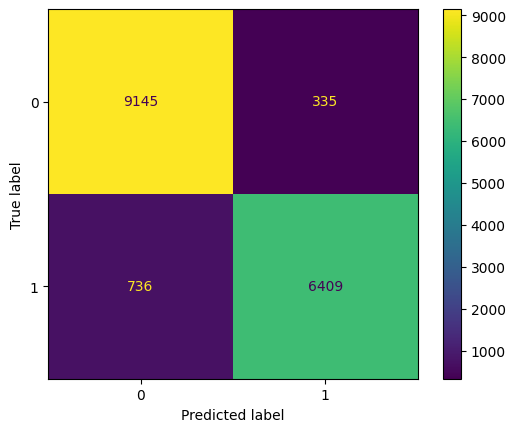

ROC AUC: 0.98


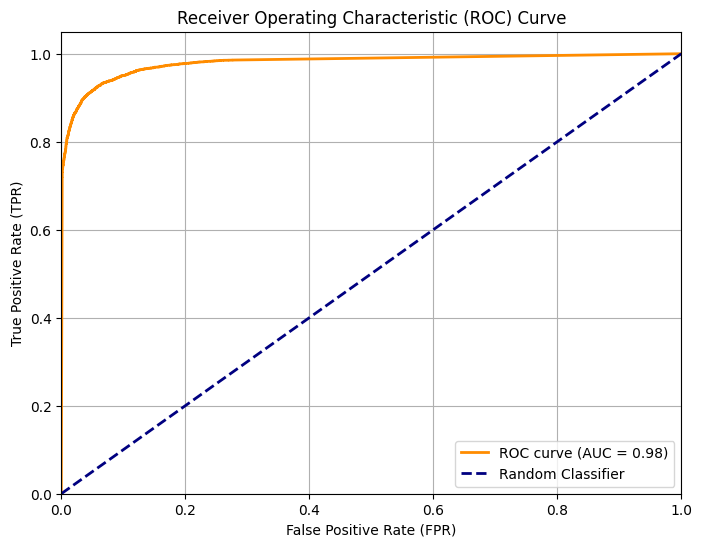

In [ ]:
roc_auc_cnn=evaluat(best_model_cnn, X_test, y_test)

In [ ]:
pip install xgboost

In [ ]:

from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=RANDOM_STATE,
    n_jobs=-1
)


full_xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocess),
    ('clf', xgb_classifier)
])

param_xgb = {
    'clf__n_estimators': [300, 500],
    'clf__learning_rate': [0.01, 0.1],
    'clf__max_depth': [5, 7],
    'clf__min_child_weight': [5, 10],
}


xgb_grid_search = GridSearchCV(
    estimator=full_xgb_pipeline,
    param_grid=param_xgb,
    cv=2,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)


print("开始 XGBoost 网格搜索...")
xgb_grid_search.fit(X_train, y_train)
print("XGBoost 网格搜索完成！")


best_xgb_model = xgb_grid_search.best_estimator_
best_xgb_params = xgb_grid_search.best_params_
best_xgb_score = xgb_grid_search.best_score_


开始 XGBoost 网格搜索...
Fitting 2 folds for each of 64 candidates, totalling 128 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [03:03:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost 网格搜索完成！


              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9480
           1       0.97      0.94      0.96      7145

    accuracy                           0.96     16625
   macro avg       0.96      0.96      0.96     16625
weighted avg       0.96      0.96      0.96     16625



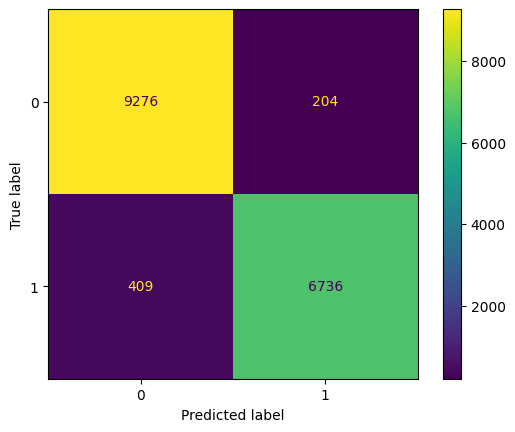

ROC AUC: 0.99


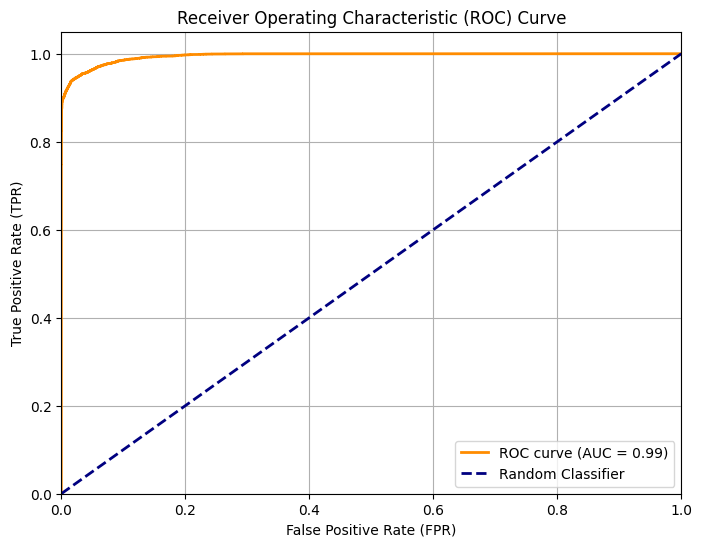

In [ ]:
best_model_xgb=best_xgb_model
roc_auc_xgb=evaluat(best_model_xgb, X_test, y_test)

In [ ]:
pred_unknown=best_model_rf.predict(unknown)
pred_unknown=np.where(pred_unknown==1, LABEL_POS, LABEL_NEG)

sub = pd.DataFrame({ID_COL: X_unknown[ID_COL], "label": pred_unknown})
sub

,id,label
0,90520,neutral or dissatisfied
1,128937,neutral or dissatisfied
2,122002,neutral or dissatisfied
3,10951,neutral or dissatisfied
4,33046,neutral or dissatisfied
...,...,...
20776,98076,neutral or dissatisfied
20777,105081,satisfied
20778,99645,satisfied
20779,23478,neutral or dissatisfied


In [ ]:
summary_rows = []

summary_rows.append({"model": "dt", "best_params": best_params_dt,"cv_acc": best_score_dt, "roc-auc": roc_auc_dt})
summary_rows.append({"model": "lr", "best_params": best_params_lr,"cv_acc": best_score_lr, "roc-auc": roc_auc_lr})
summary_rows.append({"model": "svm", "best_params": best_params_svc,"cv_acc": best_score_svc, "roc-auc": roc_auc_svm})
summary_rows.append({"model": "rf", "best_params": best_params_rf,"cv_acc": best_score_rf, "roc-auc": roc_auc_rf})
summary_rows.append({"model": "knn", "best_params": best_params_cnn,"cv_acc": best_score_cnn, "roc-auc": roc_auc_cnn})
summary_rows.append({"model": "xgb", "best_params": best_xgb_params,"cv_acc": best_xgb_score, "roc-auc": roc_auc_xgb})

summary = pd.DataFrame(summary_rows).sort_values("cv_acc", ascending=False)
summary

,model,best_params,cv_acc,roc-auc
5,xgb,"{'clf__learning_rate': 0.1, 'clf__max_depth': ...",0.961172,0.994879
3,rf,"{'clf__max_depth': None, 'clf__max_features': ...",0.959773,0.993905
2,svm,"{'clf__C': 1.0, 'clf__gamma': 'scale'}",0.947668,0.987832
4,knn,"{'clf__n_neighbors': 9, 'clf__p': 1, 'clf__wei...",0.929577,0.979305
0,dt,"{'clf__max_depth': None, 'clf__max_features': ...",0.927712,0.964424
1,lr,"{'clf__C': 0.46415888336127775, 'clf__class_we...",0.877425,0.929971


In [ ]:

X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE)

best_model = best_model_rf

best_model.fit(X_tr, y_tr)


calib = CalibratedClassifierCV(best_model, method="isotonic", cv=3)
calib.fit(X_tr, y_tr)


proba_va = calib.predict_proba(X_va)[:,1]
ths = np.linspace(0.2, 0.8, 61)  # 0.2~0.8步进0.01
f1s = [f1_score(y_va, (proba_va>=t).astype(int)) for t in ths]
best_t = ths[int(np.argmax(f1s))]
print(f"Best threshold on valid for F1: {best_t:.2f}, F1={np.max(f1s):.4f}")

print("Validation report @best_t:")
print(classification_report(y_va, (proba_va>=best_t).astype(int), digits=4))

Best threshold on valid for F1: 0.47, F1=0.9562
Validation report @best_t:
              precision    recall  f1-score   support

           0     0.9554    0.9799    0.9675      9421
           1     0.9729    0.9402    0.9562      7204

    accuracy                         0.9627     16625
   macro avg     0.9641    0.9601    0.9619     16625
weighted avg     0.9630    0.9627    0.9626     16625



In [ ]:

calib.fit(X, y)
proba_unknown = calib.predict_proba(X_unknown)[:,1]
pred_unknown = np.where(proba_unknown>=best_t, LABEL_POS, LABEL_NEG)

sub = pd.DataFrame({ID_COL: X_unknown[ID_COL], "label": pred_unknown})
sub.to_csv("kaggle_submission.csv", index=False)
print("Saved: kaggle_submission.csv")

Saved: kaggle_submission.csv


In [ ]:
# === 4) 待比较模型与参数空间 ===
candidates = {
    "logreg": (
        LogisticRegression(max_iter=500, n_jobs=None, class_weight=None, solver="lbfgs"),
        {
            "clf__C": np.logspace(-2, 1, 10),
            "clf__class_weight": [None, "balanced"]
        }
    ),
    "svm": (
        SVC(probability=True, random_state=RANDOM_STATE),
        {
            "clf__C": np.logspace(-1, 1.2, 10),
            "clf__gamma": ["scale", "auto"] + list(np.logspace(-3, -1, 5)),
        }
    ),
    "knn": (
        KNeighborsClassifier(),
        {
            "clf__n_neighbors": [3,5,7,9,15],
            "clf__weights": ["uniform", "distance"],
            "clf__p": [1,2]
        }
    ),
    "rf": (
        RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1),
        {
            "clf__n_estimators": [300,600,1000],
            "clf__max_depth": [6,10,15,None],
            "clf__min_samples_leaf": [1,2,5],
            "clf__max_features": ["sqrt","log2"]
        }
    ),
}

In [ ]:
# === 5) 交叉验证与随机搜索 ===
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

summary_rows = []
best_model = None
best_name = None
best_cv_f1 = -np.inf
best_search = None

for name, (est, param_grid) in candidates.items():
    pipe = Pipeline(steps=[("prep", preprocess), ("clf", est)])
    search = RandomizedSearchCV(
        pipe, param_distributions=param_grid, n_iter=30, scoring="f1", n_jobs=-1,
        cv=cv, verbose=1, random_state=RANDOM_STATE, refit=True
    )
    search.fit(X, y)
    cv_f1 = search.best_score_
    # 计算AUC以便报告（用refit后的模型做CV外评估较麻烦，这里简单留F1主报）
    summary_rows.append({
        "model": name,
        "best_params": search.best_params_,
        "cv_f1": cv_f1
    })
    if cv_f1 > best_cv_f1:
        best_cv_f1 = cv_f1
        best_model = search.best_estimator_
        best_name = name
        best_search = search

summary = pd.DataFrame(summary_rows).sort_values("cv_f1", ascending=False)
print(summary)